In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv("train.csv", sep="|")
print(data.shape)
data.head()

(282566, 9)


,fecha_compra,customer_id,product_id,type_id,business_id,channel_id,cantidad_venta,monto_venta_transf,peso_venta_transf
0,2022-01-31,7157,510,BO,21,V,1.0,0.153431,0.005211
1,2022-01-31,7157,512,BO,21,V,1.0,0.153431,0.005211
2,2022-01-31,9382,510,BO,21,V,1.0,0.153431,0.005211
3,2022-01-31,9382,512,BO,21,V,1.0,0.153431,0.005211
4,2022-01-31,9382,525,BO,21,V,1.0,0.153431,0.005790


In [4]:
#data = pd.read_csv("train.csv", sep="|",error_bad_lines=False)
#print(data.shape)

In [5]:
print(data.info())
data.head()
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282566 entries, 0 to 282565
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fecha_compra        282566 non-null  object 
 1   customer_id         282566 non-null  int64  
 2   product_id          282566 non-null  int64  
 3   type_id             282566 non-null  object 
 4   business_id         282566 non-null  int64  
 5   channel_id          282566 non-null  object 
 6   cantidad_venta      282566 non-null  float64
 7   monto_venta_transf  282566 non-null  float64
 8   peso_venta_transf   282566 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 19.4+ MB
None
(282566, 9)


In [6]:
print("Shape antes de borrar dublicados", data.shape)
data = data.drop_duplicates()
print("Shape después de borrar dublicados", data.shape)

Shape antes de borrar dublicados (282566, 9)
Shape después de borrar dublicados (282566, 9)


In [7]:
print("Data Shape", data.shape)
for col in ["customer_id","product_id","type_id","business_id", "channel_id"]:
    print("Unique Values for ", col, " - ", data[col].nunique())

Data Shape (282566, 9)
Unique Values for  customer_id  -  11987
Unique Values for  product_id  -  729
Unique Values for  type_id  -  3
Unique Values for  business_id  -  9
Unique Values for  channel_id  -  3


In [8]:
valores_unicos1 = data["type_id"].unique()
valores_unicos2 = data["business_id"].unique()
valores_unicos3 = data["channel_id"].unique()
valores_unicos4 = data["cantidad_venta"].unique()
print("type_id  ",valores_unicos1)
print("business_id  ",valores_unicos2)
print("channel_id  ",valores_unicos3)
print("cantidad_venta  ",valores_unicos4)

type_id   ['BO' 'GA' 'PA']
business_id   [21 51 52 22 54 31 71 61 32]
channel_id   ['V' 'B' 'A']
cantidad_venta   [  1.   2.  12.   3.  24.  25.   4.   5.   6.  40.  36.   7.   8.  30.
  10.   9.  11.  48. 120.  60.  20.  16.  14.  13.  18.  23.  21.  15.
  72.  96.  17.  50.  35.  38. 100.  22.  32.  28.  55.  80. 150.  85.
  31.  26. 103.  45.  70.  42.  19. 240.  37. 111. 140.  49.  65. 200.
  56.  46.  27.  53.  29.  90. 480. 125.  62.  39.  95. 130.  52.  41.
  58.  34.  68.  75. 132.  61.  44. 250. 118. 110. 121. 144. 160.  33.
 171.]


In [9]:
print(np.sum(data.isnull()), "\n")
print("Percentage of customers missing: ", round(data['customer_id'].isnull().sum() * 100 / len(data),2),"%" )

fecha_compra          0
customer_id           0
product_id            0
type_id               0
business_id           0
channel_id            0
cantidad_venta        0
monto_venta_transf    0
peso_venta_transf     0
dtype: int64 

Percentage of customers missing:  0.0 %


# EDA

In [10]:
data["fecha_compra"] = pd.to_datetime(data["fecha_compra"],format='%Y-%m-%d')
print("Minima fecha compra", min(data["fecha_compra"]))
print("Maxima fecha compra", max(data["fecha_compra"]))
data.head()

Minima fecha compra 2022-01-31 00:00:00
Maxima fecha compra 2022-03-22 00:00:00


,fecha_compra,customer_id,product_id,type_id,business_id,channel_id,cantidad_venta,monto_venta_transf,peso_venta_transf
0,2022-01-31,7157,510,BO,21,V,1.0,0.153431,0.005211
1,2022-01-31,7157,512,BO,21,V,1.0,0.153431,0.005211
2,2022-01-31,9382,510,BO,21,V,1.0,0.153431,0.005211
3,2022-01-31,9382,512,BO,21,V,1.0,0.153431,0.005211
4,2022-01-31,9382,525,BO,21,V,1.0,0.153431,0.005790


In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282566 entries, 0 to 282565
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   fecha_compra        282566 non-null  datetime64[ns]
 1   customer_id         282566 non-null  int64         
 2   product_id          282566 non-null  int64         
 3   type_id             282566 non-null  object        
 4   business_id         282566 non-null  int64         
 5   channel_id          282566 non-null  object        
 6   cantidad_venta      282566 non-null  float64       
 7   monto_venta_transf  282566 non-null  float64       
 8   peso_venta_transf   282566 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 21.6+ MB
None


In [12]:
print(("Total monto_venta", sum(data["monto_venta_transf"])))
print("Minimo monto_venta", min(data["monto_venta_transf"]))
print("Maximo monto_venta", max(data["monto_venta_transf"]))
data["monto_venta_transf"].describe()
data[data.monto_venta_transf<0]

('Total monto_venta', 7065627.633507672)
Minimo monto_venta 0.0260542396575753
Maximo monto_venta 12198.98582127164


,fecha_compra,customer_id,product_id,type_id,business_id,channel_id,cantidad_venta,monto_venta_transf,peso_venta_transf


Análisis por Tipo de negocio

In [13]:
#ANALISIS POR TYPE_ID

### Creación de agrupaciones a nivel de type_id para encontrar el recuento y el porcentaje de clientes únicos
type_id_df = data.groupby("type_id")["customer_id"].nunique().reset_index().rename(columns = {"customer_id":"count_customer_id"})

type_id_df["customer_%"] = round(type_id_df["count_customer_id"]*100/type_id_df["count_customer_id"].sum(),2)

print("--------------RECUENTO Y % DE CLIENTES ÚNICOS--------------")
print("total id_clientes: ",type_id_df["count_customer_id"].sum())
print(type_id_df)

### Creación de agrupaciones a nivel de type_id para encontrar los ingresos totales y el %
type_id_sales_df = data.groupby("type_id")["monto_venta_transf"].sum().reset_index().rename(columns = {"monto_venta_transf":"sum_monto_venta_transf"})
type_id_sales_df["monto_venta_transf%"] = round(type_id_sales_df["sum_monto_venta_transf"]*100/type_id_sales_df["sum_monto_venta_transf"].sum(),2)

print("--------------INGRESOS POR TYPE_ID------------------------")
print("total ingresos: ",type_id_sales_df["sum_monto_venta_transf"].sum())
print(type_id_sales_df)


--------------RECUENTO Y % DE CLIENTES ÚNICOS--------------
total id_clientes:  11987
  type_id  count_customer_id  customer_%
0      BO               4428       36.94
1      GA               5810       48.47
2      PA               1749       14.59
--------------INGRESOS POR TYPE_ID------------------------
total ingresos:  7065627.6335087735
  type_id  sum_monto_venta_transf  monto_venta_transf%
0      BO            9.231941e+05                13.07
1      GA            3.948310e+06                55.88
2      PA            2.194124e+06                31.05


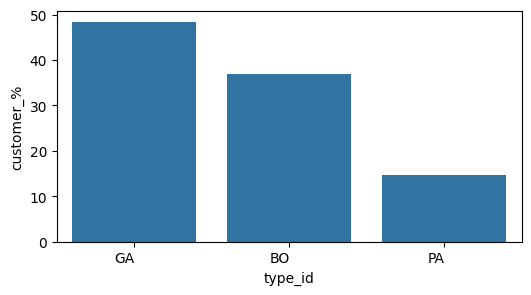

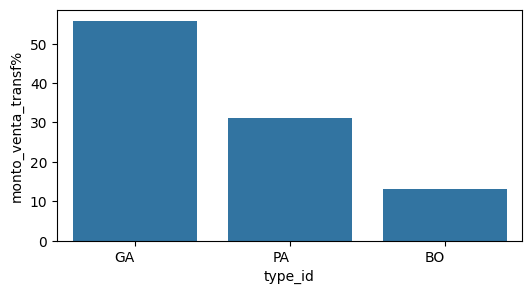

In [14]:
#PLOTEANDO
type_id_df = type_id_df.sort_values(by = "customer_%", ascending = False)
fig, ax = plt.subplots(figsize=(6,3),dpi=100)
ax=sns.barplot(x=type_id_df["type_id"], y=type_id_df['customer_%'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
plt.show()

type_id_sales_df = type_id_sales_df.sort_values(by = "monto_venta_transf%", ascending = False)
fig, ax = plt.subplots(figsize=(6,3),dpi=100)
ax=sns.barplot(x=type_id_sales_df["type_id"], y=type_id_sales_df['monto_venta_transf%'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
plt.show()

Análisis por canal de venta

In [15]:
### Creación de agrupaciones a nivel de channel_id para encontrar el recuento y el porcentaje de clientes únicos
channel_id_df = data.groupby("channel_id")["customer_id"].nunique().reset_index().rename(columns = {"customer_id":"count_customer_id"})

channel_id_df["customer_%"] = round(channel_id_df["count_customer_id"]*100/channel_id_df["count_customer_id"].sum(),2)

print("--------------RECUENTO Y % DE CLIENTES ÚNICOS--------------")
print("total id_clientes: ",channel_id_df["count_customer_id"].sum())
print(channel_id_df)

### Creación de agrupaciones a nivel de channel_id para encontrar los ingresos totales y el %
channel_id_sales_df = data.groupby("channel_id")["monto_venta_transf"].sum().reset_index().rename(columns = {"monto_venta_transf":"sum_monto_venta_transf"})
channel_id_sales_df["monto_venta_transf%"] = round(channel_id_sales_df["sum_monto_venta_transf"]*100/channel_id_sales_df["sum_monto_venta_transf"].sum(),2)

print("--------------INGRESOS POR CHANNEL_ID------------------------")
print("total ingresos: ",channel_id_sales_df["sum_monto_venta_transf"].sum())
print(channel_id_sales_df)

--------------RECUENTO Y % DE CLIENTES ÚNICOS--------------
total id_clientes:  15212
  channel_id  count_customer_id  customer_%
0          A                325        2.14
1          B               6450       42.40
2          V               8437       55.46
--------------INGRESOS POR CHANNEL_ID------------------------
total ingresos:  7065627.6335087735
  channel_id  sum_monto_venta_transf  monto_venta_transf%
0          A            1.198280e+04                 0.17
1          B            4.874293e+06                68.99
2          V            2.179352e+06                30.84


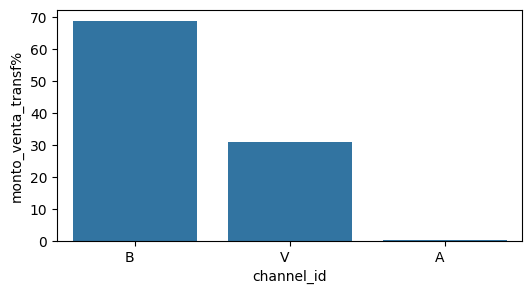

In [16]:
channel_id_sales_df = channel_id_sales_df.sort_values(by = "monto_venta_transf%", ascending = False)
fig, ax = plt.subplots(figsize=(6,3),dpi=100)
ax=sns.barplot(x=channel_id_sales_df["channel_id"], y=channel_id_sales_df['monto_venta_transf%'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
plt.show()

Extraer data de GASTRONOMIA

In [17]:
from pandas._libs.tslibs.offsets import MonthOffset
#Extraer data de gastronomia
GA_df = data[data.type_id  == "GA"]
GA_df['fecha_compra_2'] = GA_df['fecha_compra']
#GA_df.info()
GA_df

,fecha_compra,customer_id,product_id,type_id,business_id,channel_id,cantidad_venta,monto_venta_transf,peso_venta_transf,fecha_compra_2
24,2022-01-31,3643,494,GA,51,B,1.0,0.277912,0.289492,2022-01-31
25,2022-01-31,4799,632,GA,52,B,1.0,0.283702,0.017659,2022-01-31
36,2022-01-31,8082,354,GA,21,B,2.0,0.361864,0.144746,2022-01-31
77,2022-01-31,8660,494,GA,51,V,2.0,0.558719,0.578983,2022-01-31
98,2022-01-31,4799,443,GA,21,B,2.0,0.654251,0.144746,2022-01-31
...,...,...,...,...,...,...,...,...,...,...
282517,2022-03-22,6774,813,GA,54,B,1.0,10.169838,4.400272,2022-03-22
282518,2022-03-22,8255,739,GA,54,V,1.0,10.169838,5.789831,2022-03-22
282519,2022-03-22,8457,739,GA,54,V,1.0,10.169838,5.789831,2022-03-22
282522,2022-03-22,12346,66,GA,51,B,6.0,10.192998,1.431246,2022-03-22


In [18]:
#Ver frecuencia y recencia cliente 15309 =2
customer_GA_df = GA_df[GA_df.customer_id  == 15309]
print(customer_GA_df)
#ver monto cliente 15309=52.04479117376552

monto=customer_GA_df['monto_venta_transf'].sum()
print('monto cliente 15309: ',monto)

Empty DataFrame
Columns: [fecha_compra, customer_id, product_id, type_id, business_id, channel_id, cantidad_venta, monto_venta_transf, peso_venta_transf, fecha_compra_2]
Index: []
monto cliente 15309:  0.0


In [19]:
#Productos mas populares en gastronomía (GA)
GA_product = GA_df.groupby(['product_id'],as_index= False)['cantidad_venta'].sum().sort_values(by='cantidad_venta',ascending=False)
GA_product.head()

,product_id,cantidad_venta
56,119,34665.0
25,37,29598.0
446,973,25127.0
83,165,17538.0
37,66,17033.0


# SEGMENTACIÓN RFM

In [20]:
analysis_date = GA_df["fecha_compra"].max() + pd.DateOffset(1)
print("RFM Fecha de análisis :", analysis_date)

start_date = analysis_date - pd.DateOffset(days = 365)
print("Fecha de inicio al tomar datos de 1 año :", start_date)


RFM Fecha de análisis : 2022-03-23 00:00:00
Fecha de inicio al tomar datos de 1 año : 2021-03-23 00:00:00


In [21]:
#data_quantity = GA_df[GA_df.fecha_compra >= start_date].groupby(['customer_id'],as_index=False).agg({'fecha_compra_2': 'nunique'}).rename(columns = {'fecha_compra_2': 'Frecuencia',})
data_quantity = GA_df[['customer_id','product_id','cantidad_venta']].groupby(['customer_id','product_id'],as_index=False).sum()
data_quantity.head()


,customer_id,product_id,cantidad_venta
0,28,29,1.0
1,28,38,2.0
2,28,163,1.0
3,28,165,2.0
4,28,177,12.0


In [22]:
# Agregar datos a nivel de cliente para obtener valores de RFM
data_rfm = GA_df[GA_df.fecha_compra >= start_date].groupby(['customer_id'],as_index=False).agg({'fecha_compra': lambda x: (analysis_date - x.max()).days,
'fecha_compra_2': 'nunique','monto_venta_transf': 'sum'}).rename(columns = {'fecha_compra': 'Recencia', \
                                            'fecha_compra_2': 'Frecuencia','monto_venta_transf': 'Monetario'})
print(data_rfm.shape)
data_rfm.head()

(5810, 4)


,customer_id,Recencia,Frecuencia,Monetario
0,28,1,8,332.915285
1,47,1,8,493.160438
2,48,8,2,1990.312317
3,52,8,4,226.721099
4,62,15,4,135.869965


In [23]:
#verificar para cliente=15309
prueba=data_rfm[data_rfm.customer_id==15309]
prueba

,customer_id,Recencia,Frecuencia,Monetario


In [24]:
### Getting individual RFM scores by using quantiles for each of the columns
data_rfm['R_score'] = pd.qcut(data_rfm['Recencia'], 4, labels=False)
data_rfm['F_score'] = pd.qcut(data_rfm['Frecuencia'], 4, labels=False)
data_rfm['M_score'] = pd.qcut(data_rfm['Monetario'], 4, labels=False)

### Since a low Recency score means recent transactions and good customer, changine quantile values
### so that low values rank highest ans vice versa
data_rfm['R_score'] = 3 - data_rfm['R_score']

data_rfm['RFM'] = data_rfm.R_score.map(str) \
                            + data_rfm.F_score.map(str) \
                            + data_rfm.M_score.map(str)

### Calculating Final RFM score
data_rfm["RFM_Score"] = data_rfm['R_score'] + data_rfm['F_score'] + data_rfm['M_score']
data_rfm.head(20)

,customer_id,Recencia,Frecuencia,Monetario,R_score,F_score,M_score,RFM,RFM_Score
0,28,1,8,332.915285,3,3,2,332,8
1,47,1,8,493.160438,3,3,2,332,8
2,48,8,2,1990.312317,1,0,3,103,4
3,52,8,4,226.721099,1,1,1,111,3
4,62,15,4,135.869965,0,1,1,011,2
5,69,8,6,344.628113,1,2,2,122,5
6,71,6,7,717.345591,2,2,3,223,7
7,80,6,9,638.022011,2,3,2,232,7
8,91,1,5,153.942922,3,2,1,321,6
9,107,6,7,2776.345568,2,2,3,223,7


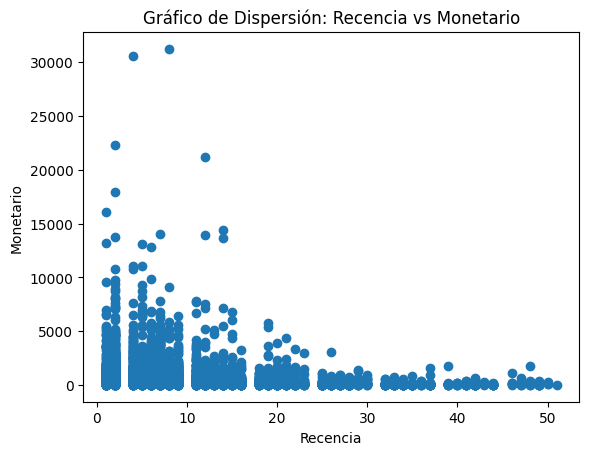

In [25]:
plt.scatter(data_rfm['Recencia'], data_rfm['Monetario'])

# Agregar etiquetas y título al gráfico
plt.xlabel('Recencia')
plt.ylabel('Monetario')
plt.title('Gráfico de Dispersión: Recencia vs Monetario')

# Mostrar el gráfico
plt.show()

In [26]:
data_rfm.groupby("RFM_Score")[['Recencia','Frecuencia', 'Monetario']].mean()

,Recencia,Frecuencia,Monetario
RFM_Score,,,
0,25.816720,1.786174,46.804059
1,17.497006,2.259481,109.891790
2,13.207510,2.733202,211.001970
3,9.712098,3.088821,445.856277
4,7.766257,4.131810,451.954206
5,6.473088,5.021246,567.802722
6,5.305825,5.825243,714.611238
7,4.674253,6.714083,1153.482831
8,3.396789,8.268349,1552.804744


# CLUSTERIZACIÓN K-MEANS

                ----------------- Distribution Plots for R,F,M -------------------------------


<Axes: xlabel='Monetario', ylabel='Density'>

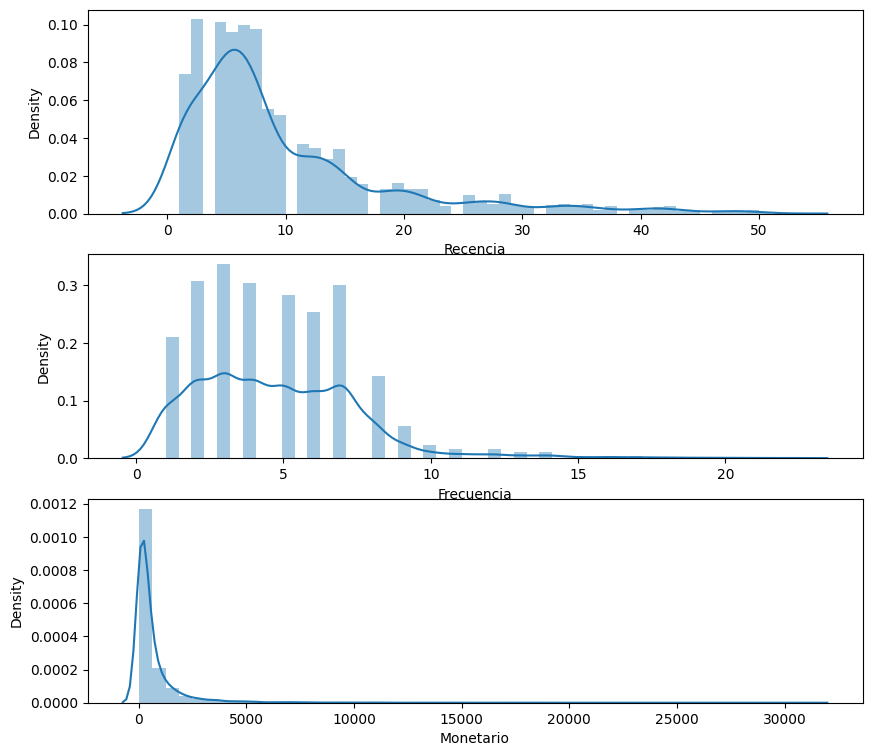

In [27]:
print("                ----------------- Distribution Plots for R,F,M -------------------------------")

# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(10,9))
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(data_rfm['Recencia'])
# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(data_rfm['Frecuencia'])
# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(data_rfm['Monetario'])

                ----------------- Log Transformation Plots for R,F,M -------------------------------


<Axes: xlabel='log_M', ylabel='Density'>

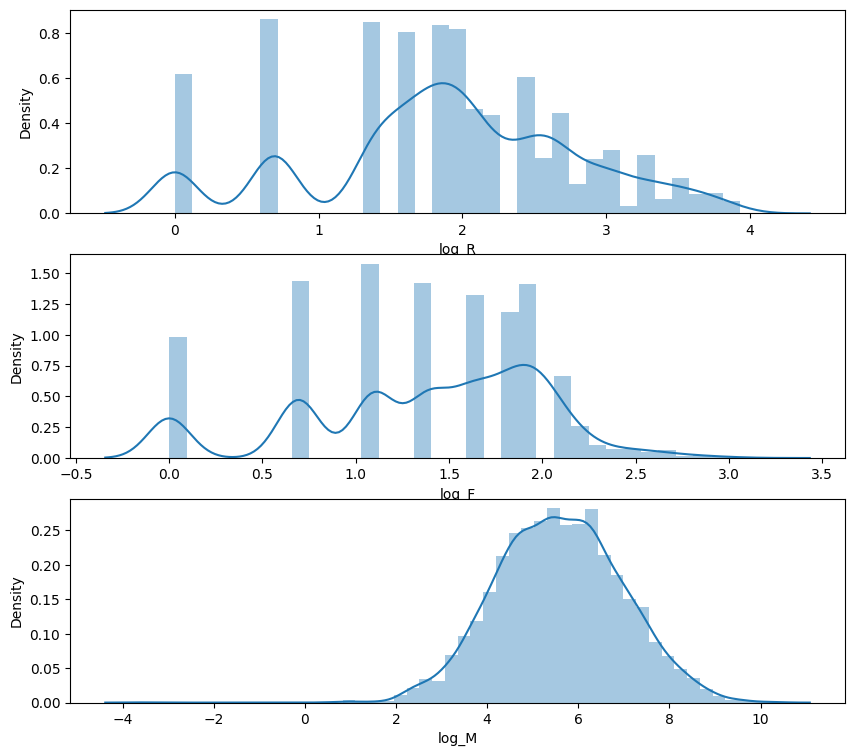

In [28]:
#from scipy import stats

# Taking Log of columns
data_rfm["log_R"] = np.log(data_rfm.Recencia)
#data_rfm['Recencia_norm_boxcox'], _ = stats.boxcox(data_rfm['Recencia'])
data_rfm["log_F"] = np.log(data_rfm.Frecuencia)
data_rfm["log_M"] = np.log(data_rfm.Monetario)

# Checking the distribution of Recency, Frequency and Monetary variables after log transformation
print("                ----------------- Log Transformation Plots for R,F,M -------------------------------")
plt.figure(figsize=(10,9))
plt.subplot(3, 1, 1)
sns.distplot(data_rfm['log_R'])
plt.subplot(3, 1, 2)
sns.distplot(data_rfm['log_F'])
plt.subplot(3, 1, 3)
sns.distplot(data_rfm['log_M'])

Método Elbow

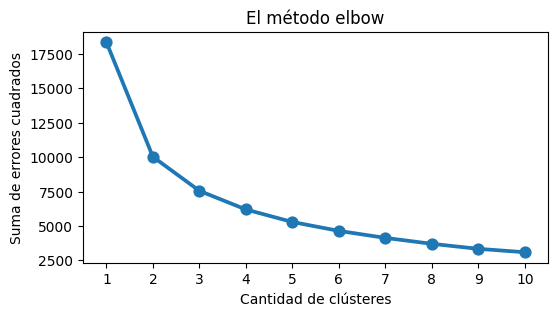

In [29]:
### Features Used in training K Means - Log Transformed Recency, Frequency and Monetary values
data_norm = data_rfm[["log_R", "log_F", "log_M"]]

sse = {}
# Fit KMeans and calculate SSE for each k
for k in range(1, 11):

    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)

    # Fit KMeans on the normalized dataset
    kmeans.fit(data_norm)

    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_

# Plotting the elbow plot
plt.figure(figsize=(6,3))
plt.title('El método elbow')
plt.xlabel('Cantidad de clústeres');
plt.ylabel('Suma de errores cuadrados')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [30]:
n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters, random_state=1)
kmeans.fit(data_norm)
data_rfm["cluster"] = kmeans.predict(data_norm)

In [31]:
data_rfm.groupby(["cluster"])[['Recencia','Frecuencia', 'Monetario']].mean()

,Recencia,Frecuencia,Monetario
cluster,,,
0,18.717916,2.235070,81.157553
1,7.169231,6.370256,1675.935062
2,5.758093,5.130359,241.686048


<Axes: >

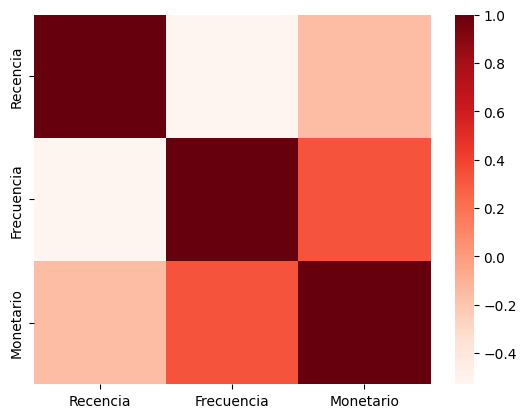

In [32]:
sns.heatmap(data_rfm[['Recencia','Frecuencia', 'Monetario']].corr(),cmap="Reds")

[[2.72492647 0.6738289  4.07168625]
 [1.70292355 1.73102287 7.09495945]
 [1.49053309 1.55679547 5.33948091]]


Text(0, 0.5, 'Monetario')

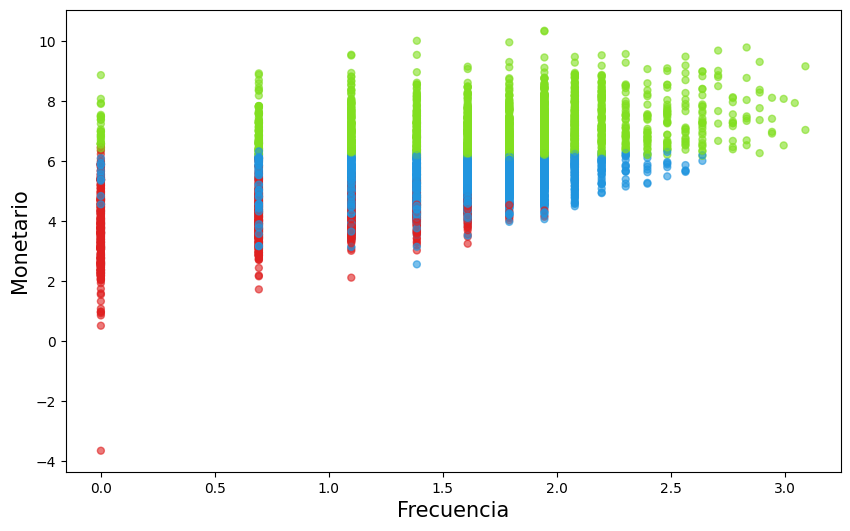

In [33]:
# get centroids
centroids = kmeans.cluster_centers_
print(centroids)
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]

## add to dataframe
# data_rfm['cen_x'] = data_rfm.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3]})
# data_rfm['cen_y'] = data_rfm.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2],3:cen_y[3]})
data_rfm['cen_x'] = data_rfm.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
data_rfm['cen_y'] = data_rfm.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF', '#610B5E']
data_rfm['c'] = data_rfm.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})

# Plot clusters
plt.figure(figsize=(10,6))
plt.scatter(data_rfm.log_F, data_rfm.log_M, c=data_rfm.c, alpha = 0.6, s=25)
plt.xlabel('Frecuencia', fontsize=15)
plt.ylabel('Monetario', fontsize=15)

[[2.72492647 0.6738289  4.07168625]
 [1.70292355 1.73102287 7.09495945]
 [1.49053309 1.55679547 5.33948091]]


Text(0, 0.5, 'Monetario')

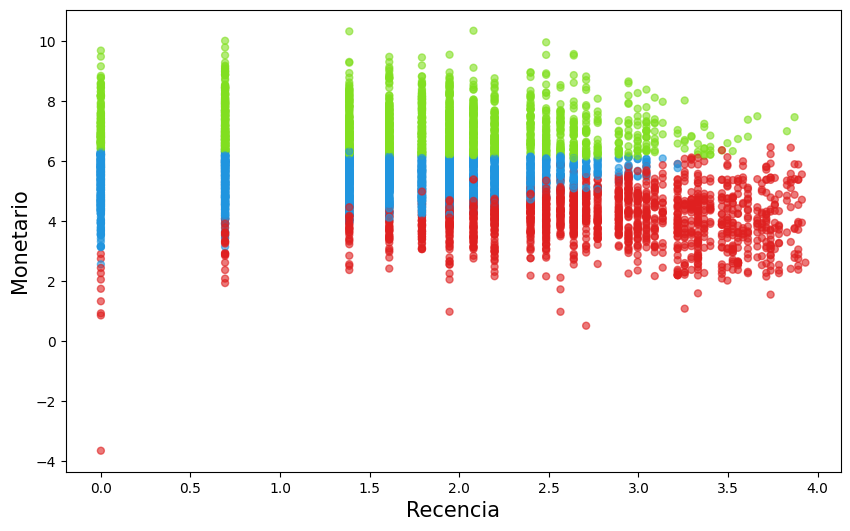

In [34]:
# get centroids
centroids = kmeans.cluster_centers_
print(centroids)
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]

## add to dataframe
# data_rfm['cen_x'] = data_rfm.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3]})
# data_rfm['cen_y'] = data_rfm.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2],3:cen_y[3]})
data_rfm['cen_x'] = data_rfm.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
data_rfm['cen_y'] = data_rfm.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF', '#610B5E']
data_rfm['c'] = data_rfm.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})

# Plot clusters
plt.figure(figsize=(10,6))
plt.scatter(data_rfm.log_R, data_rfm.log_M, c=data_rfm.c, alpha = 0.6, s=25)
plt.xlabel('Recencia', fontsize=15)
plt.ylabel('Monetario', fontsize=15)

[[2.72492647 0.6738289  4.07168625]
 [1.70292355 1.73102287 7.09495945]
 [1.49053309 1.55679547 5.33948091]]


Text(0, 0.5, 'Frecuancia')

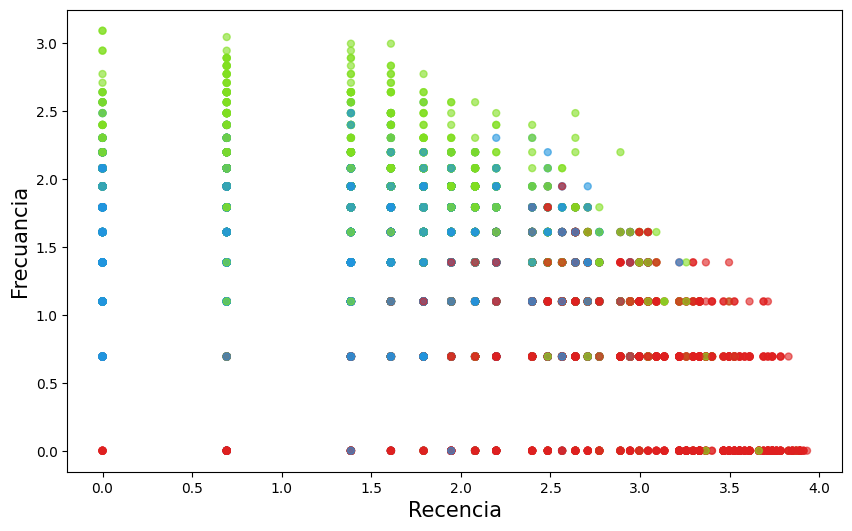

In [35]:
# get centroids
centroids = kmeans.cluster_centers_
print(centroids)
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]

## add to dataframe
# data_rfm['cen_x'] = data_rfm.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3]})
# data_rfm['cen_y'] = data_rfm.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2],3:cen_y[3]})
data_rfm['cen_x'] = data_rfm.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
data_rfm['cen_y'] = data_rfm.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF', '#610B5E']
data_rfm['c'] = data_rfm.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})

# Plot clusters
plt.figure(figsize=(10,6))
plt.scatter(data_rfm.log_R, data_rfm.log_F, c=data_rfm.c, alpha = 0.6, s=25)
plt.xlabel('Recencia', fontsize=15)
plt.ylabel('Frecuancia', fontsize=15)

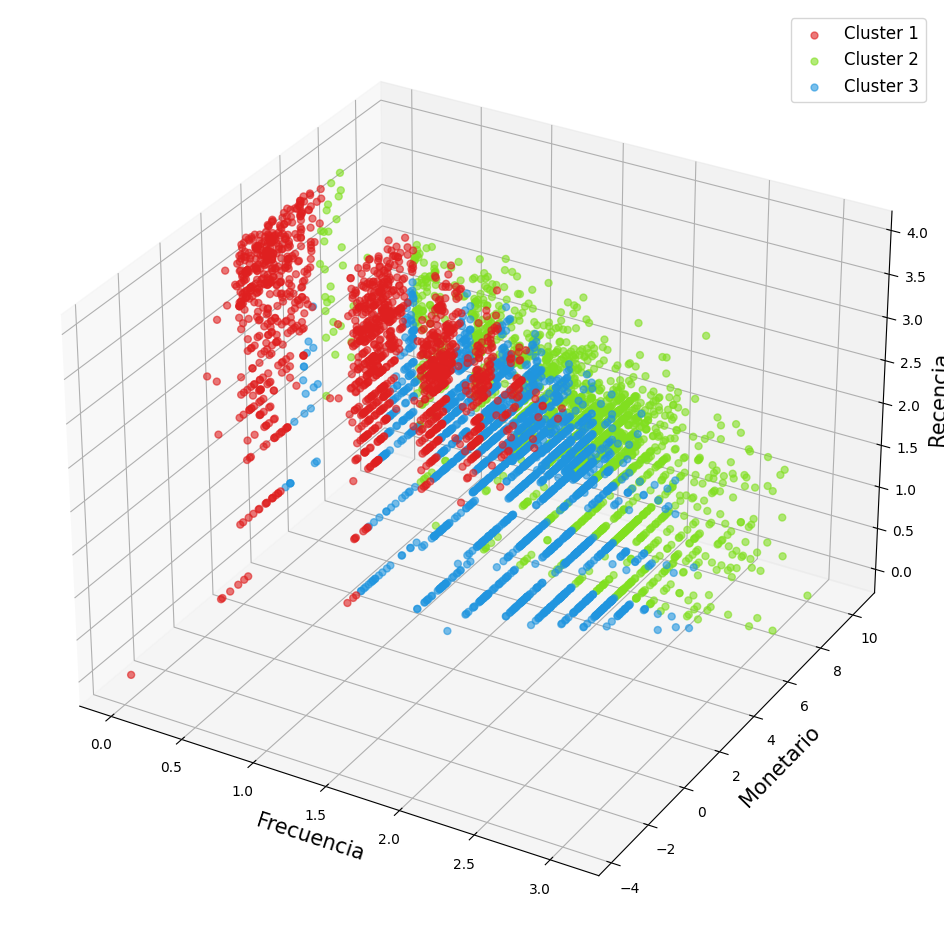

In [36]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Obtener las coordenadas de los centroides
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]
cen_z = [i[2] for i in centroids]

# Añadir al DataFrame
data_rfm['cen_x'] = data_rfm.cluster.map({0: cen_x[0], 1: cen_x[1], 2: cen_x[2]})
data_rfm['cen_y'] = data_rfm.cluster.map({0: cen_y[0], 1: cen_y[1], 2: cen_y[2]})
data_rfm['cen_z'] = data_rfm.cluster.map({0: cen_z[0], 1: cen_z[1], 2: cen_z[2]})

# Definir y asignar colores
colors = ['#DF2020', '#81DF20', '#2095DF', '#610B5E']
data_rfm['c'] = data_rfm.cluster.map({0: colors[0], 1: colors[1], 2: colors[2], 3: colors[3]})

# Crear la figura 3D
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Graficar los clusters en 3D
for cluster_id in range(len(centroids)):
    cluster_data = data_rfm[data_rfm['cluster'] == cluster_id]
    ax.scatter(cluster_data['log_F'], cluster_data['log_M'], cluster_data['log_R'], c=colors[cluster_id], alpha=0.6, s=25, label=f'Cluster {cluster_id+1}')

# Etiquetas de los ejes
ax.set_xlabel('Frecuencia', fontsize=15)
ax.set_ylabel('Monetario', fontsize=15)
ax.set_zlabel('Recencia', fontsize=15)

# Añadir leyenda
ax.legend(fontsize=12)

plt.show()


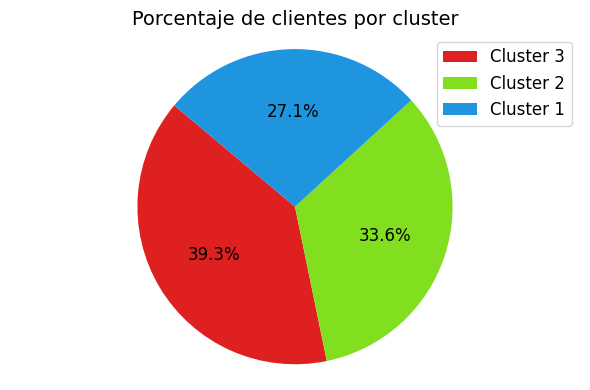

In [40]:
import matplotlib.pyplot as plt

# Calcular el porcentaje de clientes por cluster
cluster_counts = data_rfm['cluster'].value_counts(normalize=True) * 100

# Renombrar los clusters
cluster_counts.index = [f'Cluster {i+1}' for i in cluster_counts.index]

# Configurar colores
colors = ['#DF2020', '#81DF20', '#2095DF', '#610B5E']

# Configurar el gráfico circular
plt.figure(figsize=(6, 4))
patches, texts, autotexts = plt.pie(cluster_counts, autopct='%1.1f%%', startangle=140, colors=colors)

# Personalizar texto en los sectores
for text, autotext in zip(texts, autotexts):
    text.set_fontsize(12)
    autotext.set_fontsize(12)

# Añadir leyenda
plt.legend(patches, cluster_counts.index, loc="upper right", fontsize=12)
plt.title('Porcentaje de clientes por cluster', fontsize=14)

# Mostrar el gráfico
plt.axis('equal')  # asegura que el gráfico sea circular
plt.tight_layout()  # ajusta el diseño para evitar recorte de etiquetas
plt.show()
